# Market Analysis on the Google Play Store
This dataset contains data of 10 thousand apps from the Google Play Store. We will use this dataset to simulate the whole Google Play Store to carry out a market analysis.

Before we start, we need to import the necessary packages and get familiar with our data. This will help us determine which part of our data needs to be cleaned/wrangled.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
style.use('fivethirtyeight') # this is the style we will use for our plots

#read the csv files
apps = pd.read_csv('googleplaystore.csv')
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:

# drop duplicates
apps = apps.drop_duplicates(subset = ['App', 'Category', 'Rating', 'Genres'], keep='first')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 0 to 10840
Data columns (total 13 columns):
App               9756 non-null object
Category          9756 non-null object
Rating            8291 non-null float64
Reviews           9756 non-null object
Size              9756 non-null object
Installs          9756 non-null object
Type              9755 non-null object
Price             9756 non-null object
Content Rating    9755 non-null object
Genres            9756 non-null object
Last Updated      9756 non-null object
Current Ver       9748 non-null object
Android Ver       9753 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


All of the parameters except Rating are of data type object, this will cause problems for our analysis. There are also null values we need to deal with.
 - convert Installs and Reviews to int
 - convert Size and Price to float

In [4]:
#there is a row that contains incorrect inputs, we will remove it
apps = apps.drop([10472])
#first we start with size
#let us have a look at the values in this column
apps.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

It seems reasonable to use M (MB) as the universal unit for this column. There are ambiguous values in this columns such as 1000+ and 'Varies wth device'. For the former, we will assign 1001 to each, and for the latter we will assign the average size of all the apps for simplicity.  

In [5]:
def convert_size(df_value):
    try:
        size = float(df_value[:-1])
        unit = df_value[-1]

        if unit == 'M':
            value = size
        elif unit == 'k':
            value = size/1000
        elif unit == '+':
            value == 1001
        elif df_value == 'Varies with device':
            value = 0
#prevent an error 
    except ValueError:
        value = 0
    return value
apps.Size  = apps.Size.apply(convert_size)
#assign the mean size of apps to the apps with 'Varies with device' as its' size
apps.Size = apps.Size.apply(lambda x: round(apps.Size.mean(), 3) if x == 0 else x)


In [6]:
#convert Price to float
apps.Price = apps.Price.apply(lambda x: 0 if x == 'Everyone' else x)
apps.Price = apps.Price.str.strip('$').astype(float)

In [7]:
apps.Reviews = apps.Reviews.str.strip('$').astype(int)
apps.Installs = apps.Installs.str.strip('+').str.replace(',', '').astype(int)

There are also null values we need to deal with. Let us first explore what is the cause of the null values, then we will tplan how to sort them out accordingly.

Text(0, -20, "Most of our null values come from the Rating column, we will deal with it by assigning\nthe mean rating corresponding to the app's genre. There are also 4 more columns containing\na small number of null values, we will drop those apps as the proportion is insignificant.")

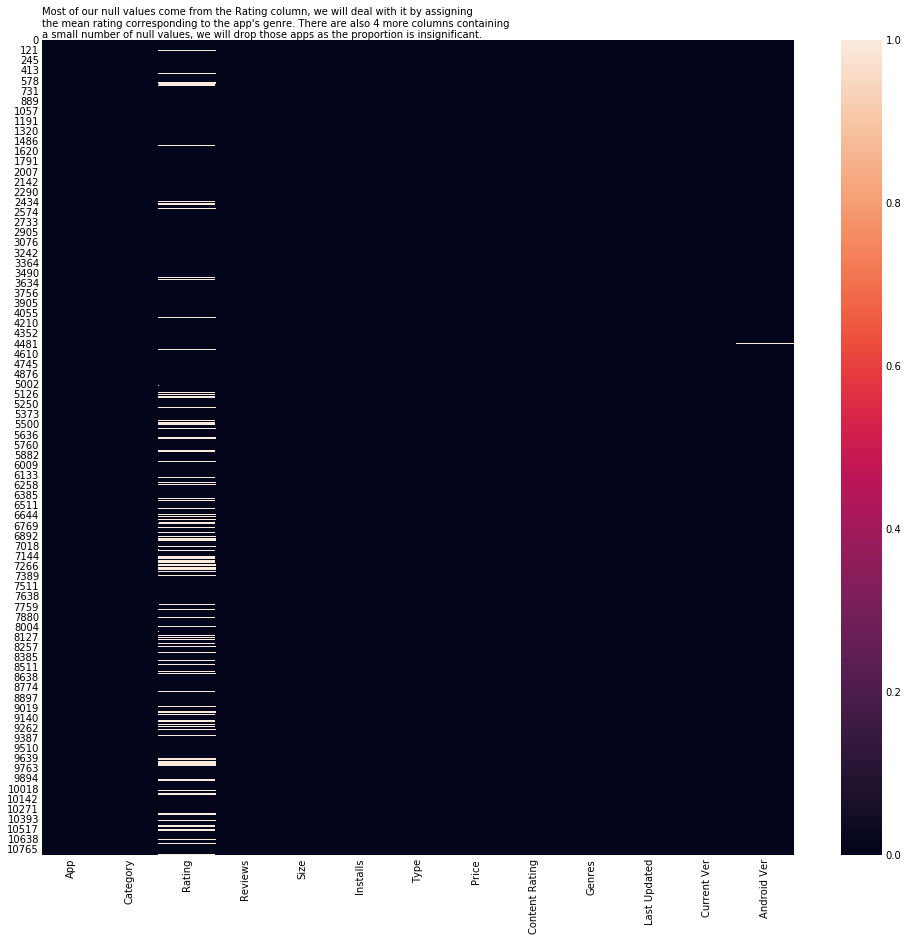

In [8]:
#we can get a clear picture of where the null values are located using a heatmap
x = apps.isnull()
plt.figure(figsize = (15,15))
sns.heatmap(x)
plt.text(x = 0, y = -20, s = 
         '''Most of our null values come from the Rating column, we will deal with it by assigning
the mean rating corresponding to the app\'s genre. There are also 4 more columns containing
a small number of null values, we will drop those apps as the proportion is insignificant.''')

In [9]:
#get the list of categories
cat_list = apps.Category.unique().tolist()
#impute the mean to the apps with missing value
for i in range(len(cat_list)):
        genre_rating_mean = round(apps.loc[apps.Category == cat_list[i]].Rating.mean(),1)
        apps.loc[(apps['Category'] == cat_list[i]) & (apps['Rating'].isnull()), 'Rating'] = genre_rating_mean


#finally we drop the rows that still contain null values
apps = apps.dropna()

# Data Visualization
## General market breakdown

Text(0, -1, 'Family apps account for 19.6% of all apps with games following behind at 9.9%')

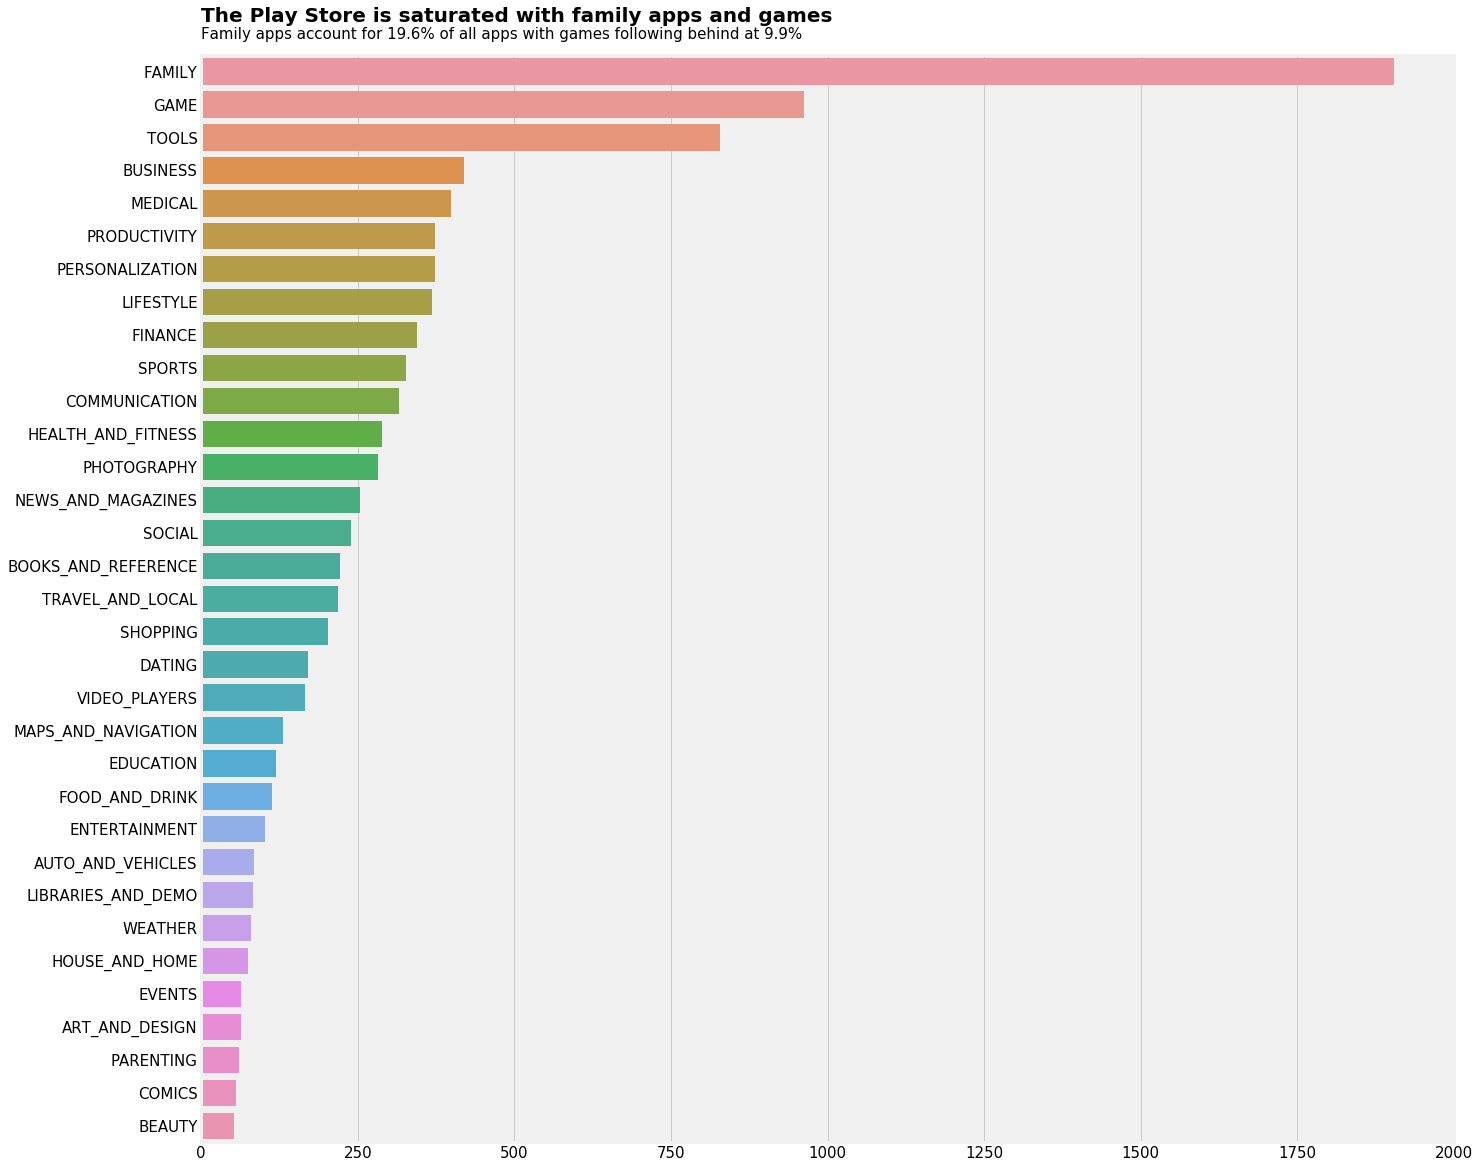

In [10]:
# barchart of pct of apps per category
plt.figure(figsize = (20,20))
x = apps.Category.value_counts()
percentage = x/9744
sns.barplot(y= x.index.tolist(), x = x.values.tolist(), label = percentage.values.tolist())
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.text(s = 'The Play Store is saturated with family apps and games',
         weight = 'bold', fontsize = 20, x = 0, y = -1.5)
plt.text(x = 0, y = -1,
               s = '''Family apps account for 19.6% of all apps with games following behind at 9.9%''',
              fontsize = 15)

### Code for plotly interactive graphs
    category_of_apps = apps['Category'].value_counts()
    labels = category_of_apps.index.tolist()
    values = category_of_apps.values.tolist()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title_text='''The market is saturated with "Family" and "Game" apps.''')
    fig.show()


A question you might ask is 'What is a Family app?', unfortunately this cannot be exlpained in one word. Within the Family category, there are games, tools, communication apps, etc. Below is the list of the genres of apps in the Family category. The genres as we can see are actually very loosely defined. In order for us to use the "Genres" column to perform any meaningul anlysis, we will have to clean it.

There are some frequent words which we can easily spot out, those are 'Entertainment', 'Education', 'Simulation', 'Action', etc.
For us to dive deeper, let us explore these one by one and then determine a way we can use to simplify the 'Genres' column.
Then we will use the simplified genres to assign each app to a new category, we will name this column as 'New category'.

In [11]:
#create a new column with a copy of the category, so we don't alter the original dataset
apps['New category'] = apps['Category']

no_apps= apps.loc[apps.Category == 'FAMILY'].shape[0]
no_unique = len(apps.loc[apps.Category == 'FAMILY', 'Genres'].unique())
print('There are {0} apps in the "FAMILY" category'.format(no_apps))
print('There are {0} unique genres in the "FAMILY" category'.format(no_unique))
apps.loc[apps.Category == 'FAMILY', 'Genres'].value_counts()


There are 1905 apps in the "FAMILY" category
There are 73 unique genres in the "FAMILY" category


Entertainment                            486
Education                                419
Simulation                               189
Casual                                   148
Puzzle                                    97
Role Playing                              93
Strategy                                  82
Educational;Education                     38
Educational                               37
Education;Education                       31
Casual;Pretend Play                       25
Puzzle;Brain Games                        18
Racing;Action & Adventure                 16
Board;Brain Games                         15
Education;Pretend Play                    14
Arcade;Action & Adventure                 14
Casual;Action & Adventure                 13
Educational;Pretend Play                  13
Casual;Brain Games                        12
Entertainment;Music & Video               12
Action;Action & Adventure                 11
Simulation;Action & Adventure              7
Educationa

There are 7 unique values for the Genres with the term 'entertainment', each with a 'flavor'


In [12]:
#let us first look at the apps in the family category and genres that has the word entertainment in it
case = apps.loc[(apps['New category'] == 'FAMILY') & (apps.Genres.str.contains('entertainment', case = False))]
no_apps = case.Genres.shape[0]
unique_genres = case.Genres.unique()
no_unique_genres = len(unique_genres)
print('There are {0} apps in the "FAMILY" category with the term "Entertainment" in their "Genres"\n\n'.format(no_apps))
print('There are {0} unique genres in this case, and they are.'.format(no_unique_genres))
print(unique_genres)

#change category according to genre
old_cat = unique_genres.tolist()
new_cat_replace = ['VIDEO/MUSIC', 'EDUCATION', 'GAME', 'GAME', 'GAME', 'ENTERTAINMENT', 'ART_AND_DESIGN']


apps.loc[(apps.Category == 'FAMILY') & (apps.Genres.str.contains('entertainment', case = False)),'New category'] = case['Genres'].apply(lambda x: 
                                                                                                                                              new_cat_replace[0] if x == old_cat[0]
                                                                                                                                              else new_cat_replace[1] if x == old_cat[1]
                                                                                                                                              else new_cat_replace[2] if x == old_cat[2]
                                                                                                                                              else new_cat_replace[3] if x == old_cat[3]
                                                                                                                                              else new_cat_replace[4] if x == old_cat[4]
                                                                                                                                              else new_cat_replace[5] if x == old_cat[5]
                                                                                                                                              else new_cat_replace[6] if x == old_cat[6]
                                                                                                                                              else None)



There are 512 apps in the "FAMILY" category with the term "Entertainment" in their "Genres"


There are 7 unique genres in this case, and they are.
['Entertainment;Music & Video' 'Entertainment;Education'
 'Entertainment;Brain Games' 'Entertainment;Action & Adventure'
 'Entertainment;Pretend Play' 'Entertainment' 'Entertainment;Creativity']


In [13]:
#let us first look at the apps in the family category and genres that has the word education in it
case = apps.loc[(apps['New category'] == 'FAMILY') & (apps.Genres.str.contains('education', case = False))]
no_apps = case.Genres.shape[0]
unique_genres = case.Genres.unique()
no_unique_genres = len(unique_genres)
print('There are {0} apps in the "FAMILY" category with the term "Education" in their "Genres"\n\n'.format(no_apps))
print('There are {0} unique genres in this case, and they are.'.format(no_unique_genres))
print(unique_genres)
# #change category according to genre
old_to_new = {'Educational;Creativity':'ART_AND_DESIGN','Educational;Education':'EDUCATION',
              'Education;Creativity':'ART_AND_DESIGN','Educational;Brain Games':'GAME',
              'Educational;Pretend Play':'GAME','Education;Education':'EDUCATION',
              'Casual;Education':'EDUCATION', 'Education;Pretend Play':'GAME',
              'Educational;Action & Adventure':'GAME', 'Education;Action & Adventure':'GAME',
              'Health & Fitness;Education':'HEALTH_AND_FITNESS', 'Adventure;Education':'GAME',
              'Education;Music & Video':'VIDEO/MUSIC', 'Education;Brain Games':'GAME', 'Education':'EDUCATION',
              'Educational':'EDUCATION', 'Trivia;Education':'EDUCATION', 'Lifestyle;Education':'LIFESTYLE',
              'Books & Reference;Education':'BOOKS_AND_REFERENCE', 'Simulation;Education':'GAME',
              'Puzzle;Education':'GAME','Role Playing;Education':'GAME', 'Strategy;Education':'GAME'}

apps.loc[(apps['New category'] == 'FAMILY') & (apps['Genres'].str.contains('education', case = False)), 'New category'] = case['Genres'].apply(lambda x: old_to_new.get(x))


There are 593 apps in the "FAMILY" category with the term "Education" in their "Genres"


There are 23 unique genres in this case, and they are.
['Educational;Creativity' 'Educational;Education' 'Education;Creativity'
 'Educational;Brain Games' 'Educational;Pretend Play'
 'Education;Education' 'Casual;Education' 'Education;Pretend Play'
 'Educational;Action & Adventure' 'Education;Action & Adventure'
 'Health & Fitness;Education' 'Adventure;Education'
 'Education;Music & Video' 'Education;Brain Games' 'Education'
 'Educational' 'Trivia;Education' 'Lifestyle;Education'
 'Books & Reference;Education' 'Simulation;Education' 'Puzzle;Education'
 'Role Playing;Education' 'Strategy;Education']


In [14]:
#let us first look at the apps in the family category and genres that has the word education in it
case = apps.loc[(apps['New category'] == 'FAMILY') & (apps.Genres.str.contains('Games', case = False))]
no_apps = case.Genres.shape[0]
unique_genres = case.Genres.unique()
no_unique_genres = len(unique_genres)
print('There are {0} apps in the "FAMILY" category with the term "Games" in their "Genres"\n\n'.format(no_apps))
print('There are {0} unique genres in this case, and they are.'.format(no_unique_genres))
print(unique_genres)

There are 48 apps in the "FAMILY" category with the term "Games" in their "Genres"


There are 6 unique genres in this case, and they are.
['Casual;Brain Games' 'Puzzle;Brain Games' 'Card;Brain Games'
 'Board;Brain Games' 'Adventure;Brain Games' 'Role Playing;Brain Games']


In [15]:
#now let us sort out the rest of the games
case = apps.loc[(apps['New category'] == 'FAMILY')]
no_apps = case.Genres.shape[0]
unique_genres = case.Genres.unique()
no_unique_genres = len(unique_genres)
print('There are {0} apps in still in the "FAMILY category"\n\n'.format(no_apps))
print('There are {0} unique genres in this case, and they are.'.format(no_unique_genres))
print(unique_genres)
games_cat = ['Casual;Brain Games', 'Adventure;Action & Adventure', 'Puzzle;Brain Games',
 'Card;Brain Games', 'Casual;Pretend Play', 'Simulation;Action & Adventure',
 'Art & Design;Pretend Play', 'Casual;Action & Adventure',
 'Casual;Creativity', 'Racing;Action & Adventure',
 'Arcade;Pretend Play', 'Action;Action & Adventure',
 'Role Playing;Action & Adventure' 'Simulation;Pretend Play'
 'Puzzle;Creativity', 'Sports;Action & Adventure',
 'Arcade;Action & Adventure', 'Art & Design;Action & Adventure',
 'Puzzle;Action & Adventure','Strategy;Action & Adventure',
 'Music & Audio;Music & Video', 'Board;Brain Games',
 'Board;Action & Adventure', 'Board;Pretend Play',
 'Role Playing;Pretend Play',
 'Card;Action & Adventure', 'Strategy', 'Simulation', 'Casual', 'Puzzle',
 'Role Playing',
 'Adventure;Brain Games','Role Playing;Brain Games', 'Racing;Pretend Play',
 'Strategy;Creativity']

apps.loc[(apps['New category'] == 'FAMILY'), 'New category'] = case['Genres'].apply(lambda x: 'GAME' if x in games_cat else 'FAMILY')

There are 800 apps in still in the "FAMILY category"


There are 43 unique genres in this case, and they are.
['Casual;Brain Games' 'Adventure;Action & Adventure' 'Puzzle;Brain Games'
 'Card;Brain Games' 'Casual;Pretend Play' 'Simulation;Action & Adventure'
 'Art & Design;Pretend Play' 'Casual;Action & Adventure'
 'Casual;Creativity' 'Music;Music & Video' 'Racing;Action & Adventure'
 'Arcade;Pretend Play' 'Action;Action & Adventure'
 'Role Playing;Action & Adventure' 'Simulation;Pretend Play'
 'Puzzle;Creativity' 'Sports;Action & Adventure'
 'Arcade;Action & Adventure' 'Art & Design;Action & Adventure'
 'Puzzle;Action & Adventure' 'Strategy;Action & Adventure'
 'Music & Audio;Music & Video' 'Board;Brain Games'
 'Board;Action & Adventure' 'Board;Pretend Play' 'Casual;Music & Video'
 'Role Playing;Pretend Play' 'Video Players & Editors;Creativity'
 'Card;Action & Adventure' 'Strategy' 'Simulation' 'Casual' 'Puzzle'
 'Role Playing' 'Health & Fitness;Action & Adventure'
 'Adventure;Brain G

In [16]:
#now let us sort out the rest
case = apps.loc[(apps['New category'] == 'FAMILY')]
no_apps = case.Genres.shape[0]
unique_genres = case.Genres.unique()
no_unique_genres = len(unique_genres)
print('There are {0} apps still in the "FAMILY" category"\n\n'.format(no_apps))
print('There are {0} unique genres in this case, and they are.'.format(no_unique_genres))
print(unique_genres)

old_to_new = {'Music;Music & Video':'VIDEO/MUSIC', 'Role Playing;Action & Adventure':'GAME',
 'Simulation;Pretend Play':'GAME', 'Puzzle;Creativity':'GAME', 'Casual;Music & Video':'VIDEO/MUSIC',
 'Video Players & Editors;Creativity':'VIDEO/MUSIC',
 'Health & Fitness;Action & Adventure':'HEALTH_AND_FITNESS',
 'Video Players & Editors;Music & Video':'VIDEO/MUSIC', 'Art & Design;Creativity':'ART_AND_DESIGN',
 'Books & Reference;Creativity':'BOOKS_AND_REFERENCE', 'Communication;Creativity':'COMMUNICATION'}

apps.loc[(apps['New category'] == 'FAMILY'), 'New category'] = case['Genres'].apply(lambda x: old_to_new.get(x))


#change video_players to VIDEO/MUSIC
apps.loc[apps.Category == 'VIDEO_PLAYERS','New category'] = 'VIDEO/MUSIC'

There are 21 apps still in the "FAMILY" category"


There are 11 unique genres in this case, and they are.
['Music;Music & Video' 'Role Playing;Action & Adventure'
 'Simulation;Pretend Play' 'Puzzle;Creativity' 'Casual;Music & Video'
 'Video Players & Editors;Creativity'
 'Health & Fitness;Action & Adventure'
 'Video Players & Editors;Music & Video' 'Art & Design;Creativity'
 'Books & Reference;Creativity' 'Communication;Creativity']


Text(0, -1, 'With the Family category splitted, we can see that most of the apps in the that category were games.')

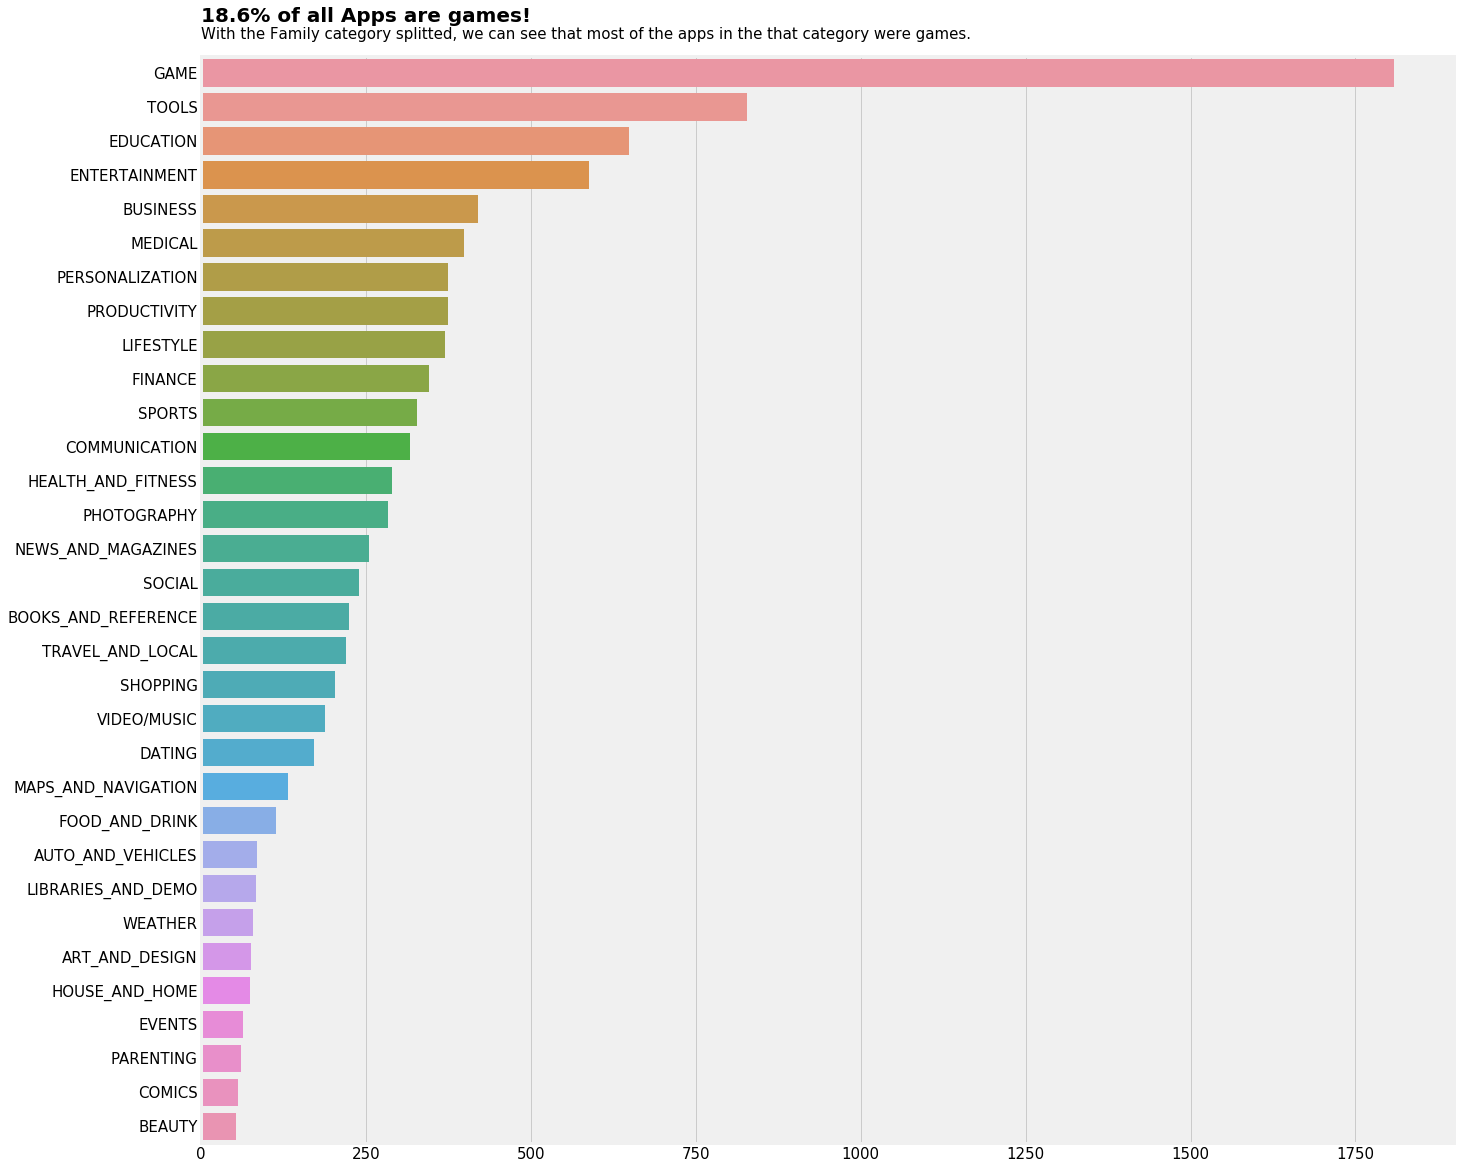

In [17]:
# barchart of pct of apps per category (new category)
plt.figure(figsize = (20,20))
x = apps['New category'].value_counts()
sns.barplot(y= x.index.tolist(), x = x.values.tolist(), label = percentage.values.tolist())
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.text(s = '18.6% of all Apps are games!',
         weight = 'bold', fontsize = 20, x = 0, y = -1.5)
plt.text(x = 0, y = -1,
               s = '''With the Family category splitted, we can see that most of the apps in the that category were games.''',
              fontsize = 15)

### Plotly code
    category_of_apps = apps['New category'].value_counts()
    labels = category_of_apps.index.tolist()
    values = category_of_apps.values.tolist()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title_text='''18.6% of all apps in the Play Store are games!''')
    fig.show()


Text(0, -0.75, 'Despite Communication apps accounting for only 3% of all apps,it has the second highest installs as a category')

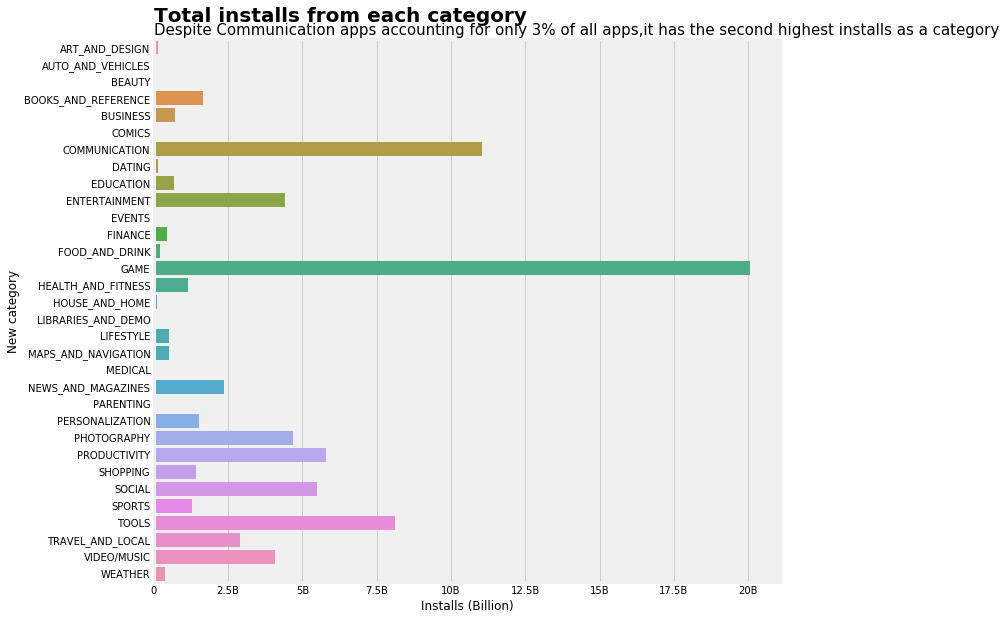

In [18]:
plt.figure(figsize = (10,10))
data = pd.pivot_table(data = apps, values = 'Installs', index = 'New category', aggfunc=sum).sort_index()
sns.barplot(y = data.index, x = data['Installs'], data = data)
plt.xlabel('Installs (Billion)')
labels = ['0', '2.5B', '5B', '7.5B', '10B', '12.5B', '15B', '17.5B', '20B']
plt.xticks(np.arange(0, 20000000001, 2500000000), labels)
plt.text(s = 'Total installs from each category',
         weight = 'bold', fontsize = 20, x = 0, y = -1.5)
plt.text(x = 0, y = -0.75,
               s = '''Despite Communication apps accounting for only 3% of all apps,it has the second highest installs as a category''',
              fontsize = 15)



### Plotly code
    x = apps
    fig = px.bar(x, x='New category', y='Installs',color = 'New category',height = 1000, hover_data = ['App', 'Installs'])
    fig.update_layout(
        showlegend=False,
        title=go.layout.Title(
            text="Total number of installs for each category<br>Despite COMMUNICATION accounting for only 3.25% of the apps, it is the second most installed <br>category. However, this category is extremely competitive as it is dominated by only 11 apps.",
            xref="paper",
            x=0
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="Category",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="Installs",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        )
    )
    fig.show()


## Successful Apps VS Regular Apps
The Play Store is full of apps. There are many great apps, and unfortunately the same applies to bad apps too. If you think about it, there probably isn't a single app on your phone that wasn't downloaded by at least one million other users. Let us use our data to find the trends that cause an app to be successful.

Before we do this, we will need to define what is considered to be a sucessful app, I can think of two ways to do this:

1.set a threshold for the apps we should consider, say only apps with over 10million installs, this will give us 1428 apps

2.sort the dataset by installs and cut it at the 90th percentile to give us the top ten percent apps by installs 974 apps

Due to the nature of our data, we cannot use method 2, so we will go with method 1.

#### So we will now define a 'successful app' to be any app with over 10 million installs and 'regular app' for apps with less that 10 million installs.

In [19]:
# we will use method 1 for this particular analysis as the nature of the dataset prevents method 2 from obtaining a fair sample
# here we will define top apps as any apps that has over 10million installs
top_apps = apps[apps['Installs'] >= 10000000]
data = top_apps['New category'].value_counts().to_frame().sort_index()
data['Labels'] = data.index

# get the percentage of apps in top 10 % by each category
category_of_top_apps = top_apps['New category'].value_counts().sort_index()
category_of_all_apps = apps.loc[apps['New category'].apply(lambda x: x in category_of_top_apps.index.tolist()),
                                'New category'].value_counts().sort_index()
data['Percentage of apps'] = ((category_of_top_apps / category_of_all_apps) * 100)

# get the sum of installs from each category
sum_top_apps = pd.pivot_table(data = top_apps, values = 'Installs', index = 'New category', aggfunc=np.sum)
sum_all = pd.pivot_table(data = apps.loc[apps['New category'].apply(lambda x: x in sum_top_apps.index.tolist())],
                        values = 'Installs', index = 'New category', aggfunc=np.sum)
data['Percentage of installs'] = ((sum_top_apps/sum_all) * 100)

# round up the percentages
data['Percentage of apps'] = data['Percentage of apps'].round(2)
data['Percentage of installs'] = data['Percentage of installs'].round(2)
data

,New category,Labels,Percentage of apps,Percentage of installs
ART_AND_DESIGN,6,ART_AND_DESIGN,7.89,71.95
AUTO_AND_VEHICLES,2,AUTO_AND_VEHICLES,2.35,37.64
BEAUTY,1,BEAUTY,1.89,36.77
BOOKS_AND_REFERENCE,24,BOOKS_AND_REFERENCE,10.71,95.44
BUSINESS,20,BUSINESS,4.76,83.19
COMICS,1,COMICS,1.79,22.23
COMMUNICATION,77,COMMUNICATION,24.29,98.55
DATING,8,DATING,4.68,56.77
EDUCATION,26,EDUCATION,4.01,65.46
ENTERTAINMENT,72,ENTERTAINMENT,12.24,94.50


Text(0, -0.75, 'The "Game" category is not only saturated, but also the most popular category')

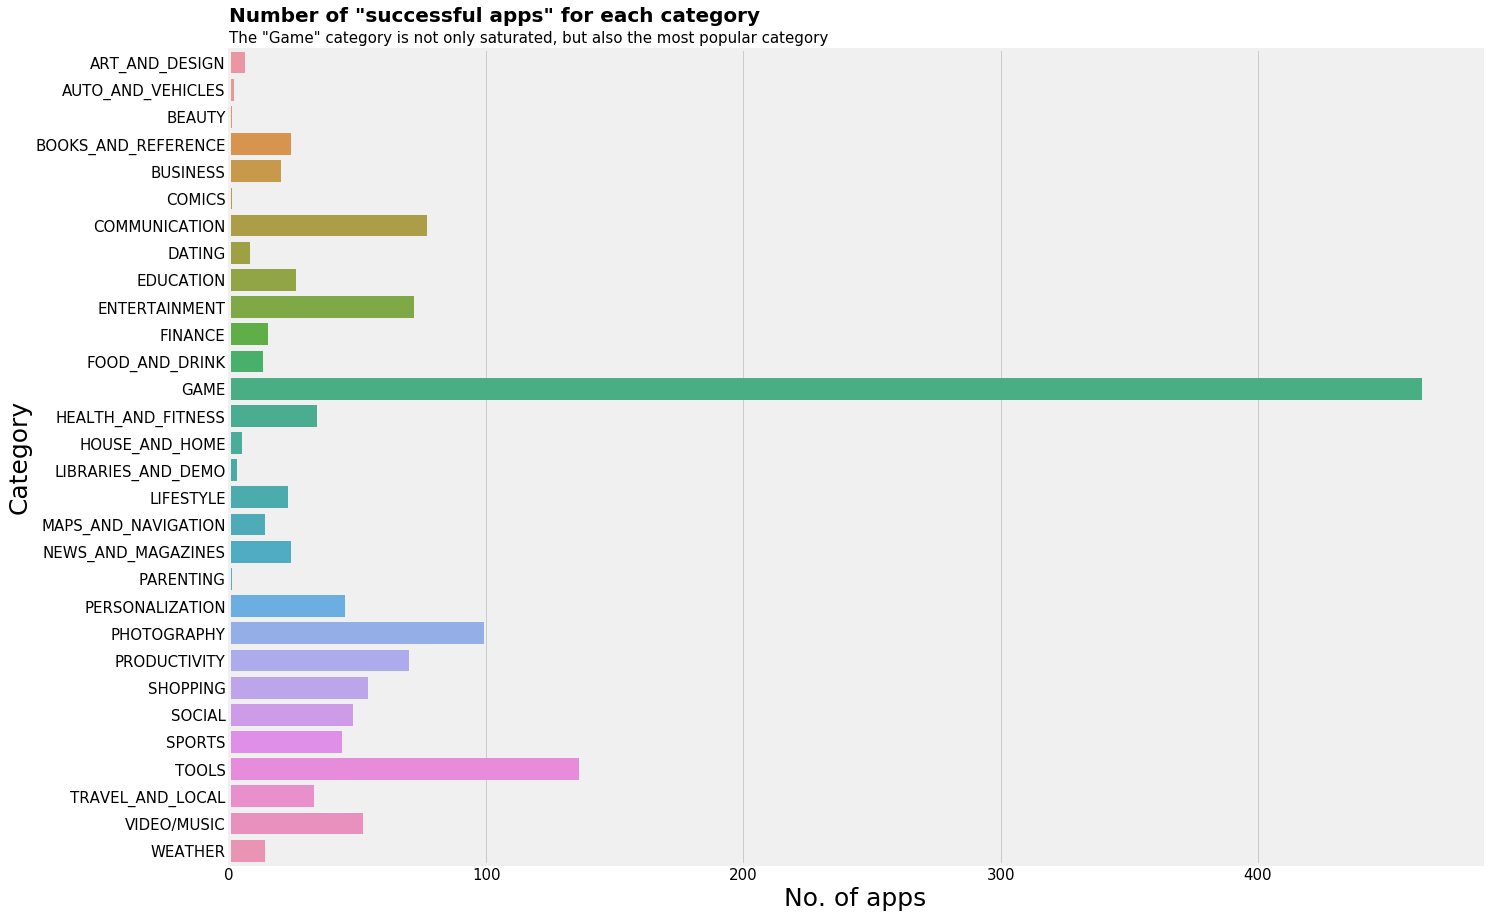

In [20]:
#let us see the proportion of categories
#get data into the form we need
#plot

plt.figure(figsize  = (20,15))
sns.barplot(data = data, y = 'Labels', x='New category')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Category', fontsize = 25)
plt.xlabel('No. of apps', fontsize = 25)
plt.text(s = 'Number of "successful apps" for each category',
         weight = 'bold', fontsize = 20, x = 0, y = -1.5)
plt.text(x = 0, y = -0.75,
               s = '''The "Game" category is not only saturated, but also the most popular category''',
              fontsize = 15)


### Plotly code

    fig = px.bar(data,x ='Labels', y = 'New category', color = 'Labels', hover_data=['Percentage of apps', 'Percentage of installs'])
    fig.update_layout(
        showlegend = False,

        title=go.layout.Title(
            text="Number of top apps from each category<br>Games are the most saturated and the most popular category",
            xref="paper",
            x=0
        ),

        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="Category",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="No. of Apps",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        )
    )
    fig.show()

Text(0, -0.75, 'Photography apps have the highest chance of being a "successful app" as 35% of apps from this category have achieve this milestone')

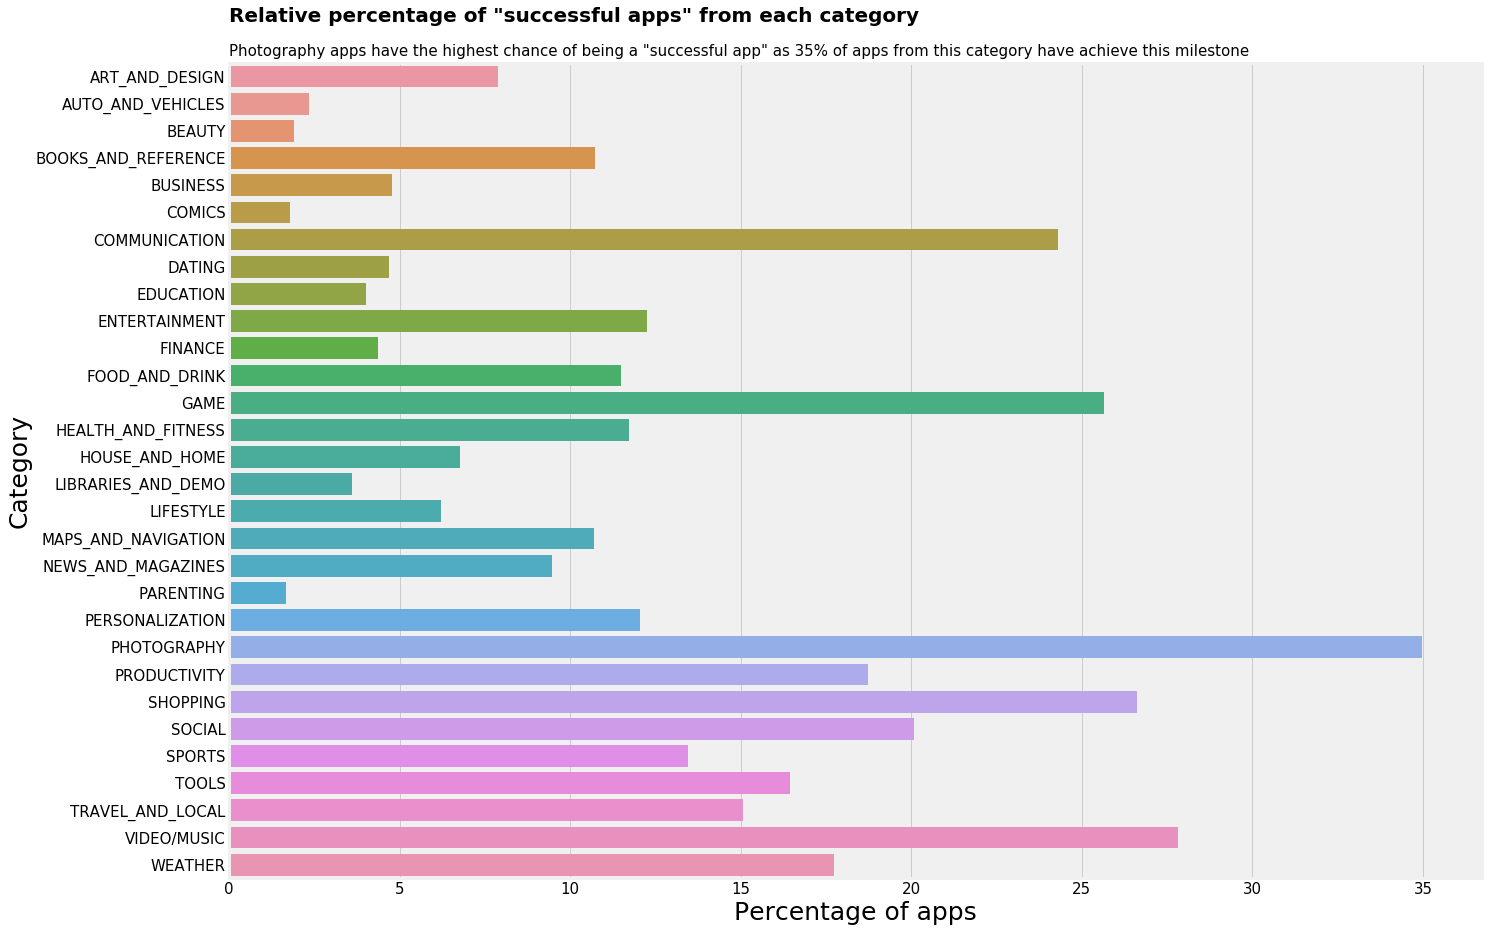

In [21]:
plt.figure(figsize  = (20,15))
sns.barplot(data = data, y = 'Labels', x='Percentage of apps')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Category', fontsize = 25)
plt.xlabel('Percentage of apps', fontsize = 25)
plt.text(s = 'Relative percentage of "successful apps" from each category',
         weight = 'bold', fontsize = 20, x = 0, y = -2)
plt.text(x = 0, y = -0.75,
               s = '''Photography apps have the highest chance of being a "successful app" as 35% of apps from this category have achieve this milestone''',
              fontsize = 15)


### Plotly code    
    #plot to see how many percent of apps of each category are in the top ten percent of apps

    fig = px.bar(data, x = 'Labels', y = 'Percentage of apps', color = 'Labels', hover_data=['Percentage of installs'])

    fig.update_layout(
        showlegend = False,

        title=go.layout.Title(
            text="The relative percentage of top apps from each category<br>Photography apps has the highest chance of becoming a 'Top app'",
            xref="paper",
            x=0
        ),

        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="Category",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="Percentage",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        )
    )
    fig.show()




Text(0, -0.75, '24% of Communication apps account for 98% of all installations from that category')

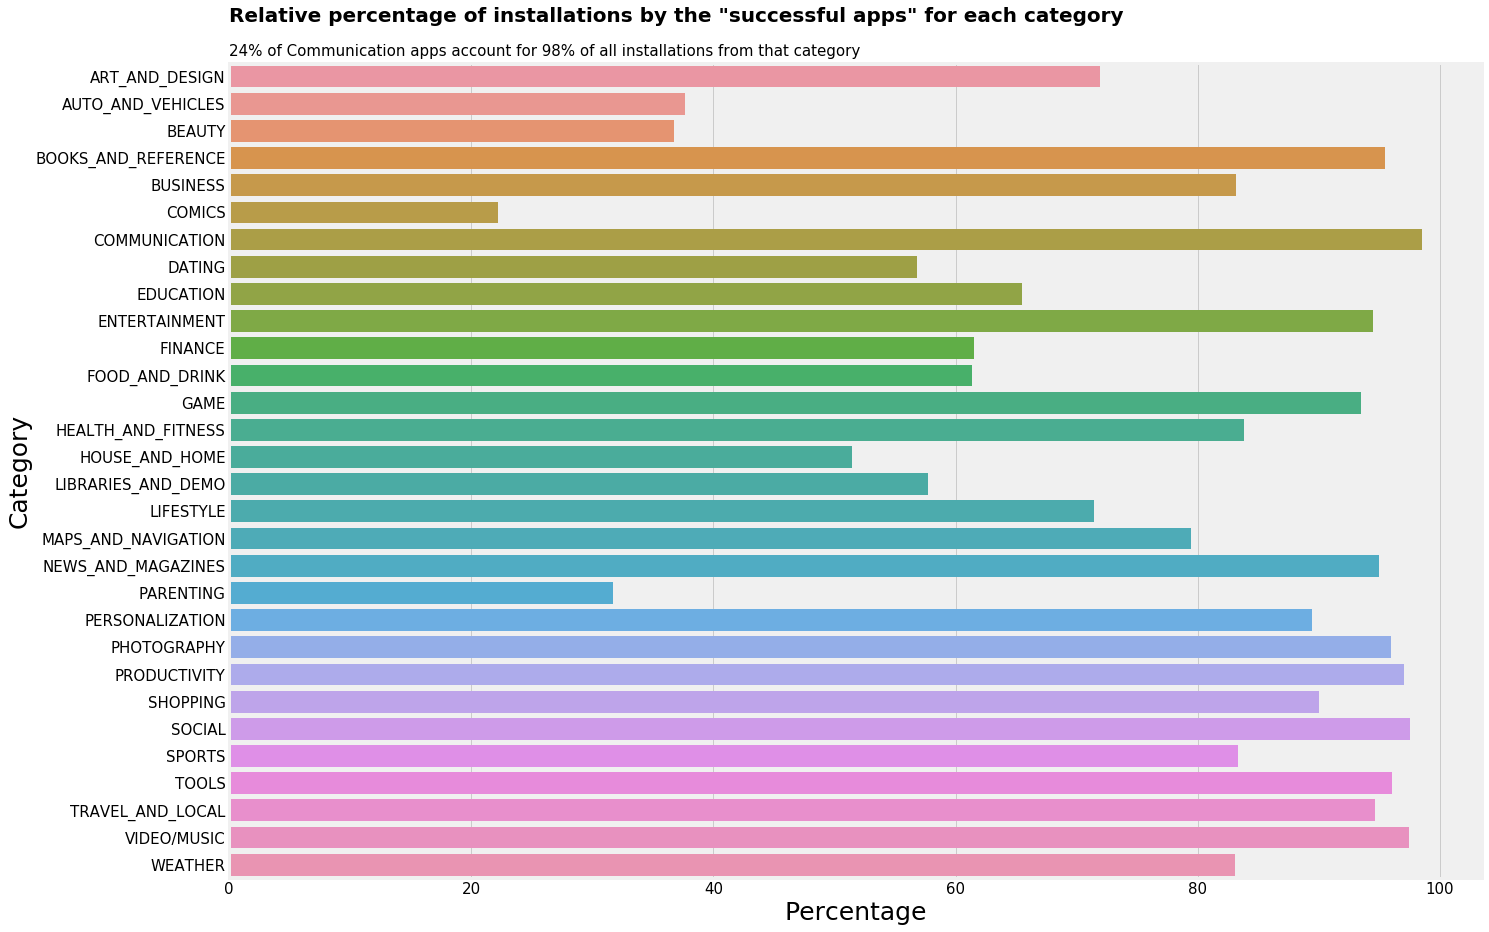

In [22]:
plt.figure(figsize  = (20,15))
sns.barplot(data = data, y = 'Labels', x='Percentage of installs')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Category', fontsize = 25)
plt.xlabel('Percentage', fontsize = 25)
plt.text(s = 'Relative percentage of installations by the "successful apps" for each category',
         weight = 'bold', fontsize = 20, x = 0, y = -2)
plt.text(x = 0, y = -0.75,
               s = '''24% of Communication apps account for 98% of all installations from that category''',
              fontsize = 15)

### plotly code
    #plot of how many percent of installs the top apps acount for from its' correpsonding category
    fig = px.bar(data, x = 'Labels', y = 'Percentage of installs', color = 'Labels', hover_data=['Percentage of apps'])

    fig.update_layout(
        showlegend = False,

        title=go.layout.Title(
            text="The relative percentage of installs generated by the top apps fo each category<br>24% of the communication apps hold 98% of all installs in that category",
            xref="paper",
            x=0
        ),

        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="Category",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="Percentage",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="black"
                )
            )
        )
    )
    fig.show()


In [23]:
#number of 1billion plus apps
apps[apps['Installs'] == 1000000000]['New category'].value_counts()

COMMUNICATION          6
SOCIAL                 3
TRAVEL_AND_LOCAL       2
VIDEO/MUSIC            2
ENTERTAINMENT          2
GAME                   1
PHOTOGRAPHY            1
PRODUCTIVITY           1
BOOKS_AND_REFERENCE    1
NEWS_AND_MAGAZINES     1
TOOLS                  1
Name: New category, dtype: int64

In [24]:
#to find which categories are not featured in the top apps table
a = data['Labels'].tolist()
b = apps['New category'].value_counts().index.tolist()
for i in b:
    if i not in a:
        print(i)

MEDICAL
EVENTS


In [25]:
#how many percent of installs are from the top apps
installs_sum  = apps.Installs.sum()
print(installs_sum)
top_apps_installs_sum = top_apps.Installs.sum()
top_apps_installs_sum/installs_sum


80032372417


0.9383702835734968

## Conclusion
- Games are by far the most popular and most consumed category (Games have the highest number of "successful apps" and the most installs).
- Communication apps are very competitive and perhaps are the most used/useful apps (6 apps from this category have over 1billion installs and 24% of communication apps make up 98percent of all installs in this category! Leaving less than 2% of installs for 76% of communication apps).
- The Photography category is the least competitive. This means that an app of this category is more likely to hit 10million installs when competing against apps from the same category ( 35% of Photography apps have over 10million installs, the highest of all category).
- 'Events' and 'Medical' apps are the hardest categories to achieve the 10 million install milestone (these 2 categories have no "successful apps").
- One final fun fact: the top 1400 apps (15%) account for over 93.8% of all installs from the play store in this dataset, so despite there being so many apps, only a few of these apps manage to get a space in the users' Android devices.

## Does a large install number suggest a higher user satisfaction for an app?
Users can give an app a score of 1 to 5(integers only). A low score indicates that the user is not happy with the current state of the app and the opposite for a high score. The Rating column stores every app's average user rating.

A question we might want to ask is 'why do these apps attract so many users?'. Is it because they are awesome? If that is the case then it should have a higher average user rating than the rest of the apps, right?

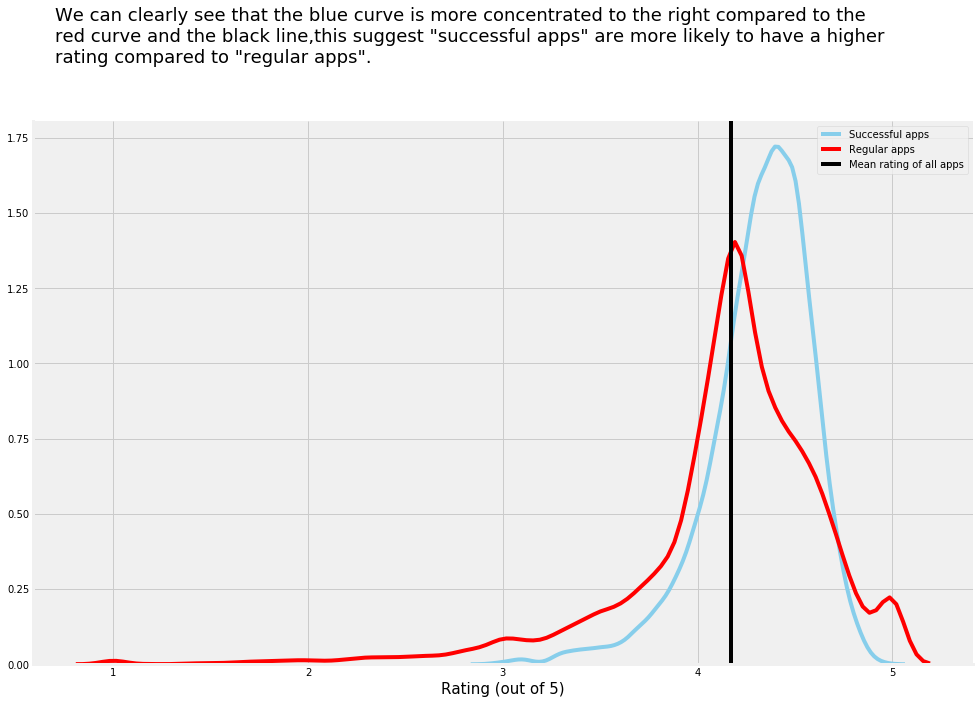

In [26]:
apps['Top'] = apps['Installs'].apply(lambda x: 'Top app' if x >= 10000000
                                    else 'Bottom app')
plt.figure(figsize = (15,10))
sns.kdeplot( apps.loc[apps['Top'] == 'Top app', 'Rating'],
             color="skyblue", label="Successful apps")
sns.kdeplot( apps.loc[apps['Top'] == 'Bottom app', 'Rating'] , 
             color="red", label="Regular apps")
plt.axvline(apps.Rating.mean(), color = 'black', label = 'Mean rating of all apps')
plt.legend()
plt.xlabel('Rating (out of 5)', fontsize = 15)
plt.text(x = 0.7, y = 2, fontsize =18,
         s='We can clearly see that the blue curve is more concentrated to the right compared to the \nred curve and the black line,this suggest "successful apps" are more likely to have a higher \nrating compared to "regular apps".')
sns.despine()




In [27]:
mean_top = apps.loc[apps['Top'] == 'Top app', 'Rating'].mean()
mean_bottom = apps.loc[apps['Top'] != 'Bottom app', 'Rating'].mean()
print(mean_bottom)
print('The mean rating for "successful apps" is {0}, which is higher than {1}, the mean rating of the "regular apps".'.format(round(mean_top,1), 
                                                                                                   round(mean_bottom),1))

4.317997198879554
The mean rating for "successful apps" is 4.3, which is higher than 4, the mean rating of the "regular apps".


#### Therefore, we conclude that an app with high installs will most likely have an above average user rating

## What Are The Factors That Cause An App To Have Over 10 Million Installs
There are still 4 parameters we have not yet explored, they are the 'Size', 'Type', 'Content rating', and 'Price' columns.
We will explore each briefly and see if any of these parameters play a role in the making of a "successful app"

Text(0, -0.6, 'It appears that in general, "successful apps" are lighter in size')

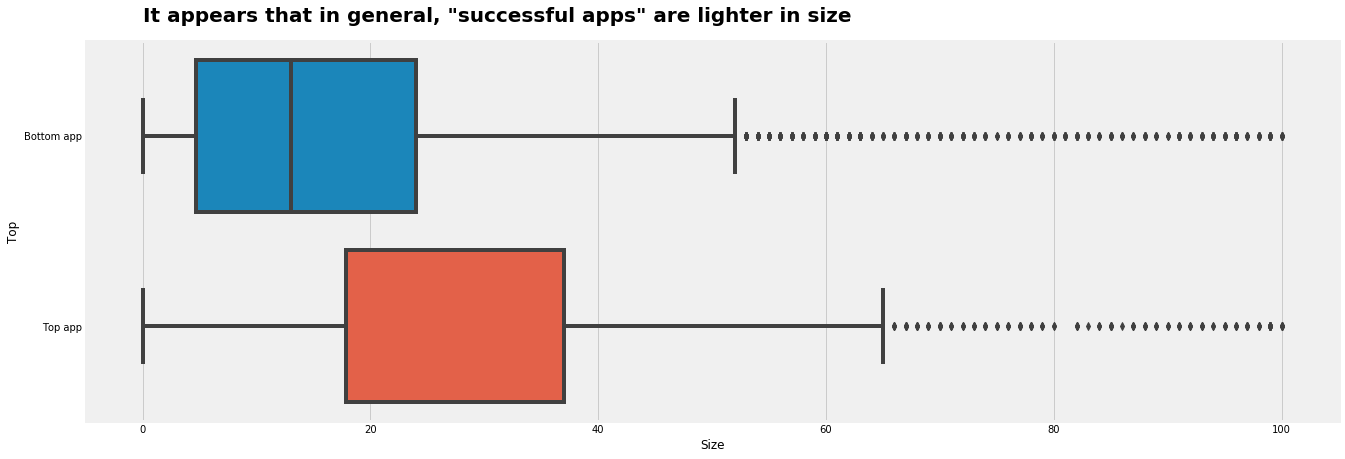

In [28]:
#Size
plt.figure(figsize = (20,7))
sns.boxplot(x = 'Size', y = 'Top', data = apps)
plt.text(x = 0, y = -0.6, s= 'It appears that in general, "successful apps" are lighter in size', weight = 'bold',
         fontsize = 20)


Text(-1, 800, 'There are only 2 "Successful apps" out of the 755 paid to install apps')

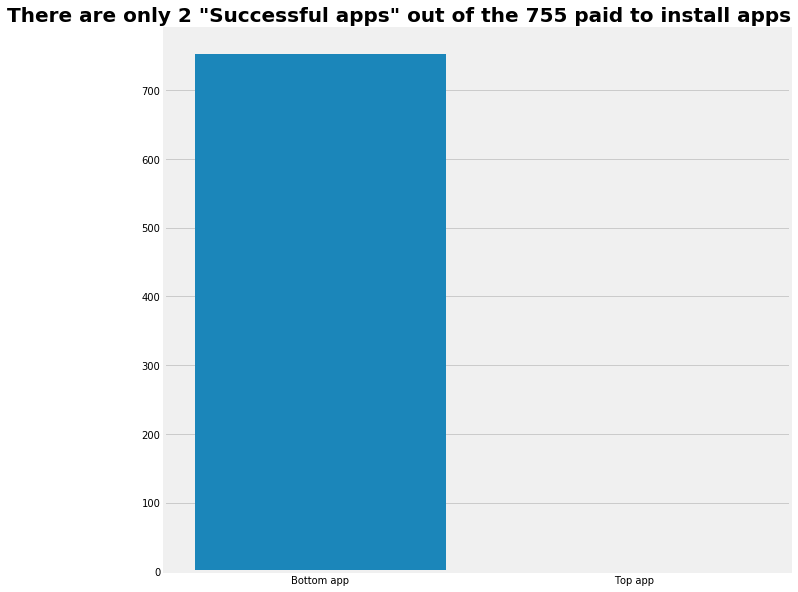

In [29]:
#Type/Price
x = apps[apps['Type'] == 'Paid']
y = x['Top'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x = y.index.tolist(), y=y.values.tolist())
plt.text(x = -1, y = 800, s= 'There are only 2 "Successful apps" out of the 755 paid to install apps', weight = 'bold',
         fontsize = 20)

Text(0.5, 0, 'No. of apps')

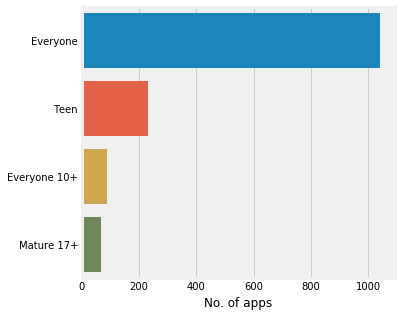

In [30]:
#content rating
data = top_apps['Content Rating'].value_counts()
plt.figure(figsize = (5,5))
sns.barplot(x = data.values, y = data.index)
plt.xlabel('No. of apps')


Text(0, -1, 'Despite "Everyone" being the content rating with the most successful \napps, it is also the most competitive type of content rating.')

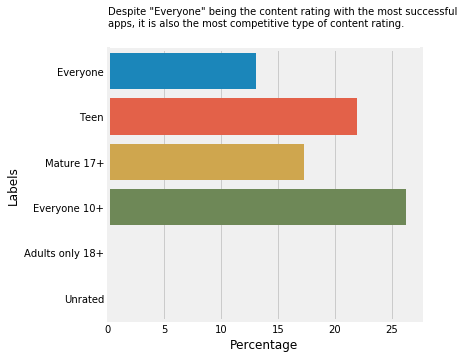

In [31]:
a = np.array([0, 0])
b = pd.Series(a,index=['Adults only 18+', 'Unrated'])
#sort series by content rating then count how many are in each top_apps/apps

##concat with b to include the two values with no apps in top_apps
content_rating_top = top_apps['Content Rating'].value_counts()
content_rating_top = content_rating_top.append(b)

content_rating_all = apps['Content Rating'].value_counts()
data = content_rating_all.to_frame()
data['Labels'] = data.index
data['Percentage'] = (content_rating_top/content_rating_all )*100
plt.figure(figsize = (5,5))
sns.barplot(data  = data, x = 'Percentage', y = 'Labels')

plt.text(x = 0, y = -1, s = 'Despite "Everyone" being the content rating with the most successful \napps, it is also the most competitive type of content rating.')


## Conclusion
- Apps that are lighter in size are more likely to be successful (over 50% of "successful apps" have a smaller file size compared to 75% of the regular apps).
- Paid to install apps have almost a 0% chance of becoming a "successful app" (only 2 apps out of 755 paid to install apps are "successful app"s)
- Apps with the content rating "Everyone 10+" has the highest chance of becoming a successful app when competing with apps with the same type of content rating (25 percent apps with this content rating are successful apps). 